IMPORT LIBRARIES

- In this example there are only libraries needed for the example code.

In [1]:
import numpy as np
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline

READ THE DATA:

- In this challenge you will use the dataset "Optical recognition of handwritten digits", usually indicated as Digits.
>In the following example, how to load and read  the info of  this dataset, and visualize some of the samples.


Image Data Shape (1797, 64)
Label Data Shape (1797,)


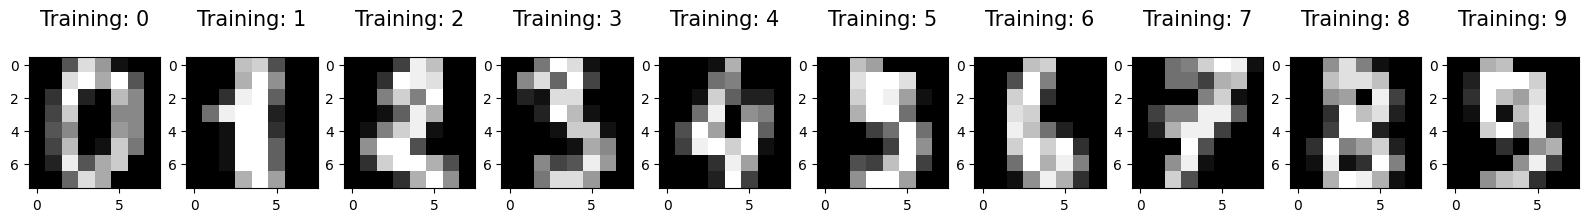

In [2]:
digits = load_digits()

print("Image Data Shape" , digits.data.shape)
print("Label Data Shape", digits.target.shape)

plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:10], digits.target[0:10])):
    plt.subplot(1, 10, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 15)


FEATURE EXTRACTION

- Transform the raw images into feature data:
>To apply a classifier on the images, we can use the pixel values as features. We need to flatten the image and turn the data in a matrix with samples on the rows and features on the columns.


In [3]:
n_samples = len(digits.images)
digits_data = digits.images.reshape((n_samples, -1))
digits_class = digits.target

FEATURE ENGINEERING AND TRAINING/TEST OF THE LEARNING MODEL 

- Evaluate if you need features normalization, feature selection or dimensionality reduction;
- Find the best parameter for a classifier using a grid search approach applied on a stratified k-fold cross validation;
- Evaluate the accuracy and the confusion matrix.

>Use these classifiers:
- SVM (different models and different kernels), see https://scikit-learn.org/stable/modules/svm.html
- Ensemble methods (e.g., RandomForest, AdaBoost, GradientBoosting, etc.), see https://scikit-learn.org/stable/modules/ensemble.html

>>Which one is the best? 
- Can you find a combination rule (e.g. majority voting, simple average, etc.) to build an ensemble of classifiers (e.g. decision trees, Naïve Bayes, etc.) with similar performances?



In [4]:
#As an example in the following code lines there is a pipeline with standard scaler and linear SVM
  #where the C parameter is optimized with a grid search on a stratified cross validation

#As an example, let's fix some variables
n_values = 11
lower_value_C = -5
higher_value_C = 5

#Let's apply a stratified 10-fold cross validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

#Let's build a pipeline with only a scaler and a linear SVM
pipe = Pipeline([('scaler', StandardScaler()),('classifier',SVC(kernel='linear'))])

#Let's build a structure for the grid search with a set of parameters for the techniques in the pipeline
#Be careful to the double underscore between the name you chose in the pipeline and the name of the parameter
#Be careful also to the function logspace for the range of the C values
parameters={'classifier__C': np.logspace(lower_value_C, higher_value_C, num=n_values,base=10)}

#Let's apply the grid search function
grid_search = GridSearchCV(pipe, parameters, cv=cv)
#Let's train and test the learning system
grid_search.fit(digits_data, digits_class)

#Here we just print the best accuracy and the corresponding values for the parameters
print("The best parameters are %s with an accuracy of %0.4f"%(grid_search.best_params_, grid_search.best_score_))

The best parameters are {'classifier__C': 0.1} with an accuracy of 0.9822
